### Import libraries

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras

### Import MNIST dataset

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Number of training examples:", train_images.shape[0])
print("Number of testing examples:", test_images.shape[0])

print("Number of train labels:", train_labels.shape[0])
print("Number of test labels:", test_labels.shape[0])

11490434/11490434 [==============================] - 0s 0us/step
Number of training examples: 60000
Number of testing examples: 10000
Number of train labels: 60000
Number of test labels: 10000


In [3]:
print("Training set image size:", train_images.shape[1:])
print("Testing set image size:", test_images.shape[1:])

Training set image size: (28, 28)
Testing set image size: (28, 28)


Text(0.5, 1.0, 'test img: 0')

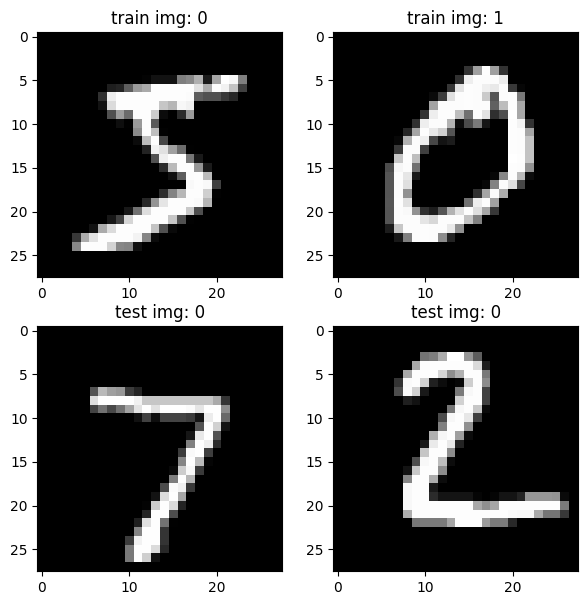

In [4]:
fig, ax = plt.subplots(2, 2,figsize=(7, 7))
ax[0][0].imshow(train_images[0], cmap='gray', vmin=0, vmax=255)
ax[0][0].set_title("train img: 0")
ax[0][1].imshow(train_images[1], cmap='gray', vmin=0, vmax=255)
ax[0][1].set_title("train img: 1")

ax[1][0].imshow(test_images[0], cmap='gray', vmin=0, vmax=255)
ax[1][0].set_title("test img: 0")
ax[1][1].imshow(test_images[1], cmap='gray', vmin=0, vmax=255)
ax[1][1].set_title("test img: 0")


### Set network architecture

In [5]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

### Network training configuration

In [6]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Data preparation

In [7]:
train_images_p = train_images.reshape(60000, 28 * 28).astype("float32")
print("train_images_p shape:", train_images_p.shape)
train_images_p = train_images_p / 255
print("min and max value:", np.min(train_images_p), np.max(train_images_p))

train_images_p shape: (60000, 784)
min and max value: 0.0 1.0


In [8]:
test_images_p = test_images.reshape(10000, 28 * 28).astype("float32")
print("train_images_p shape:", test_images_p.shape)
test_images_p = test_images_p / 255
print("min and max value:", np.min(train_images_p), np.max(train_images_p))

train_images_p shape: (10000, 784)
min and max value: 0.0 1.0


In [9]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Model fit

In [11]:
network.fit(
    x=train_images_p,
    y=train_labels,
    batch_size=128,
    epochs=5
)


Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2655 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.1088 - accuracy: 0.9680
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0701 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0516 - accuracy: 0.9843
Epoch 5/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0380 - accuracy: 0.9886


### Network evaluation

In [13]:
test_loss, test_acc = network.evaluate(test_images_p, test_labels)

print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0625 - accuracy: 0.9800
test_acc: 0.9800000190734863
